# DEEPCAMP_P1C&D&E_PREPROCESSING&MODELSML
### Objectif_Notebook : Preprocessing et modèles machine learning(hors LSTM) sans prédictions Météo

# 1. IMPORTATION DES PACKAGES


In [ ]:
#!pip install  xgboost
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from sklearn.metrics import confusion_matrix
import os
from math import radians, cos, sin, asin, sqrt
import xgboost as xgb
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

In [ ]:
#Données apprentissage
df_station_train = pd.read_csv("DataPerHourV2.csv")
#df_baseline_observation = pd.read_csv("../input/defi-ia-2022/Train/Train/Baselines/Baseline_observation_train.csv")
df_y_train = pd.read_csv("Y_train.csv")
#df_baseline_forecast   = pd.read_csv("../input/defi-ia-2022/Train/Train/Baselines/Baseline_forecast_train.csv")
df_stations_coordinate = pd.read_csv("stations_coordinates.csv")
baseline_forecast = pd.read_csv('Baseline_forecast_train.csv')

In [ ]:
df_station_train["Id_"] = ["_".join(i.split('_')[:2]) for i in list(df_station_train['Id'])]
merged_train = pd.merge(df_station_train,df_y_train,how="left",left_on="Id_", right_on="Id")
df_station_train['hour'] = [i.split('_')[-1] for i in df_station_train['Id']]
df_station_train['hour'] = df_station_train['hour'].astype(int)

In [ ]:

#Explication des données : 
                                    #df_station_train
#Données d'apprentissage par heures et par station
#Numéro station / date / ff = wind_speed / t = temperature in kelvin / td = dew temperature / 
#hu = humidity / dd = wind direction in degrees / precip the last day

                                     #df_y_train
#Précipitation réelle pour chaque jour et chaque station

                                    # df_stations_coordinate
#Coordonnées GPS des stations

                                    #df_baseline_observation
#Précipitation de la veille pour chaque jour et chaque station 

                                    #df_baseline_forecast
#Précipitation prédite par Météo France pour chaque jour et chaque station


#Pour temperature prendre mean des diff temp dpeuis heure 11
#
#Precip prendre somme des 24 dernieres heures et chacune des heures



# CHOIX DES HEURES A PRENDRE POUR CHAQUE VARIABLE ET TYPE AGGREGATION

In [ ]:
df_st = df_station_train.dropna()

In [ ]:
df_st['dd_'] = [-(abs(192-i)) for i in df_st['dd']]
df_st['div_t'] = -((df_st['t'] / df_st['td'] ))
df_st['diff_t'] = -((df_st['t'] - df_st['td'] ))

In [ ]:
listehu = []
listeff = []
listedd = []
listeprecip = []
listedivt= []
listedift = []
listetd = []
listeprecip = []
for heur in range(1,24) :
    df_only = df_st[df_st['hour']>=heur].dropna()
    df_only_grouped = df_only.groupby("Id_").mean()
    df_only_grouped_merged = pd.merge(df_only_grouped,df_y_train,how="left",left_on="Id_", right_on="Id").dropna()
    mattcorr = df_only_grouped_merged.corr()
    listehu.append(mattcorr['Ground_truth']['hu'])
    listeff.append(mattcorr['Ground_truth']['ff'])
    listedd.append(mattcorr['Ground_truth']['dd_'])
    listeprecip.append(mattcorr['Ground_truth']['precip'])
    listedivt.append(mattcorr['Ground_truth']['div_t'])
    listedift.append(mattcorr['Ground_truth']['diff_t'])
    listetd.append(mattcorr['Ground_truth']['td'])
    

    

0.21921726321157856 22
0.11225770920307071 11
0.2658742361553012 16
0.2355430806283904 0
0.11497923332335928 11
0.11499770108212092 11


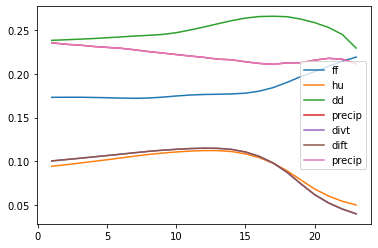

In [ ]:
#Avec le mean 
plt.plot(range(1,24),listeff,label="ff")
plt.plot(range(1,24),listehu,label="hu")
plt.plot(range(1,24),listedd,label="dd")
plt.plot(range(1,24),listeprecip,label="precip")
plt.plot(range(1,24),listedivt,label="divt")
plt.plot(range(1,24),listedift,label="dift")
plt.plot(range(1,24),listeprecip,label="precip")
print(np.max(np.array(listeff)),np.argmax(np.array(listeff)))
print(np.max(np.array(listehu)),np.argmax(np.array(listehu)))
print(np.max(np.array(listedd)),np.argmax(np.array(listedd)))
print(np.max(np.array(listeprecip)),np.argmax(np.array(listeprecip)))
print(np.max(np.array(listedivt)),np.argmax(np.array(listedivt)))
print(np.max(np.array(listedift)),np.argmax(np.array(listedift)))
plt.legend();

0.21921726321157856 22
0.08411001907328935 7
0.2294684220935473 22
0.21442085087146376 2


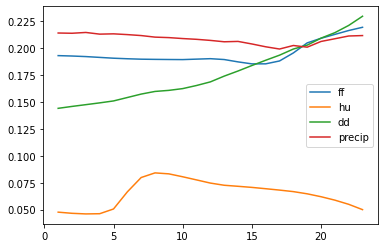

In [ ]:
listehu = []
listeff = []
listedd = []
listeprecip = []
for heur in range(1,24) :
    df_only = df_st[df_st['hour']>=heur].dropna()
    df_only_grouped = df_only.groupby("Id_").max()
    df_only_grouped_merged = pd.merge(df_only_grouped,df_y_train,how="left",left_on="Id_", right_on="Id").dropna()
    mattcorr = df_only_grouped_merged.corr()
    listehu.append(mattcorr['Ground_truth']['hu'])
    listeff.append(mattcorr['Ground_truth']['ff'])
    listedd.append(mattcorr['Ground_truth']['dd_'])
    listeprecip.append(mattcorr['Ground_truth']['precip'])
#Avec le max 
plt.plot(range(1,24),listeff,label="ff")
plt.plot(range(1,24),listehu,label="hu")
plt.plot(range(1,24),listedd,label="dd")
plt.plot(range(1,24),listeprecip,label="precip")
print(np.max(np.array(listeff)),np.argmax(np.array(listeff)))
print(np.max(np.array(listehu)),np.argmax(np.array(listehu)))
print(np.max(np.array(listedd)),np.argmax(np.array(listedd)))
print(np.max(np.array(listeprecip)),np.argmax(np.array(listeprecip)))
plt.legend();

0.21921726321157856 22
0.1122793058536546 11
0.26587423615530154 16
0.23553982798055242 0


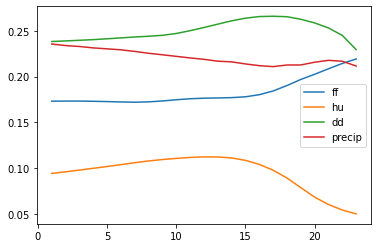

In [ ]:
listehu = []
listeff = []
listedd = []
listeprecip = []
for heur in range(1,24) :
    df_only = df_st[df_st['hour']>=heur].dropna()
    df_only_grouped = df_only.groupby("Id_").sum()
    df_only_grouped_merged = pd.merge(df_only_grouped,df_y_train,how="left",left_on="Id_", right_on="Id").dropna()
    mattcorr = df_only_grouped_merged.corr()
    listehu.append(mattcorr['Ground_truth']['hu'])
    listeff.append(mattcorr['Ground_truth']['ff'])
    listedd.append(mattcorr['Ground_truth']['dd_'])
    listeprecip.append(mattcorr['Ground_truth']['precip'])
#Avec le sum 
plt.plot(range(1,24),listeff,label="ff")
plt.plot(range(1,24),listehu,label="hu")
plt.plot(range(1,24),listedd,label="dd")
plt.plot(range(1,24),listeprecip,label="precip")
print(np.max(np.array(listeff)),np.argmax(np.array(listeff)))
print(np.max(np.array(listehu)),np.argmax(np.array(listehu)))
print(np.max(np.array(listedd)),np.argmax(np.array(listedd)))
print(np.max(np.array(listeprecip)),np.argmax(np.array(listeprecip)))
plt.legend()

0.21921726321157856 22
0.11612053145577571 15
0.2590407107069494 18
0.2115363087777977 22


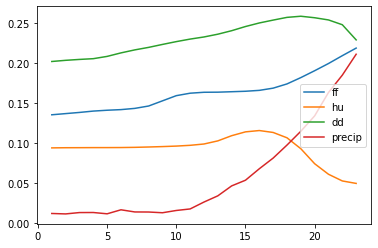

In [ ]:
listehu = []
listeff = []
listedd = []
listeprecip = []
for heur in range(1,24) :
    df_only = df_st[df_st['hour']>=heur].dropna()
    df_only_grouped = df_only.groupby("Id_").min()
    df_only_grouped_merged = pd.merge(df_only_grouped,df_y_train,how="left",left_on="Id_", right_on="Id").dropna()
    mattcorr = df_only_grouped_merged.corr()
    listehu.append(mattcorr['Ground_truth']['hu'])
    listeff.append(mattcorr['Ground_truth']['ff'])
    listedd.append(mattcorr['Ground_truth']['dd_'])
    listeprecip.append(mattcorr['Ground_truth']['precip'])
#Avec le sum 
plt.plot(range(1,24),listeff,label="ff")
plt.plot(range(1,24),listehu,label="hu")
plt.plot(range(1,24),listedd,label="dd")
plt.plot(range(1,24),listeprecip,label="precip")
print(np.max(np.array(listeff)),np.argmax(np.array(listeff)))
print(np.max(np.array(listehu)),np.argmax(np.array(listehu)))
print(np.max(np.array(listedd)),np.argmax(np.array(listedd)))
print(np.max(np.array(listeprecip)),np.argmax(np.array(listeprecip)))
plt.legend()

# Impact de la normalisation 

In [ ]:
df_st = df_station_train.dropna()
df_st_grouped = df_st.groupby('Id_').sum()
df_st_grouped_merged = pd.merge(df_st_grouped,df_y_train,how="left",left_on="Id_", right_on="Id")
scalar_df_st_grouped_merged= df_st_grouped_merged[['ff','t','td','hu','dd','precip','Ground_truth']]
scaled_df_st_grouped_merged = (scalar_df_st_grouped_merged-scalar_df_st_grouped_merged.mean())/(scalar_df_st_grouped_merged.std())
scaled_df_st_grouped_merged['Id'] = df_st_grouped_merged['Id']

In [ ]:
#MATRICE DE CORRELATION POUR LES DONNEES NORMALISEES 
scaled_df_st_grouped_merged.corr()

,ff,t,td,hu,dd,precip,Ground_truth
ff,1.000000,-0.076428,-0.053533,0.033672,0.212511,0.294816,0.172929
t,-0.076428,1.000000,0.926360,-0.400787,0.114424,-0.058162,-0.045376
td,-0.053533,0.926360,1.000000,-0.048030,0.199093,0.041151,-0.007133
hu,0.033672,-0.400787,-0.048030,1.000000,0.153039,0.258767,0.092565
dd,0.212511,0.114424,0.199093,0.153039,1.000000,0.174285,0.091397
precip,0.294816,-0.058162,0.041151,0.258767,0.174285,1.000000,0.236961
Ground_truth,0.172929,-0.045376,-0.007133,0.092565,0.091397,0.236961,1.000000


In [ ]:
#MATRICE DE CORRELATION POUR LES DONNEES NORMALISEES 
df_st_grouped_merged.corr()

,number_sta_x,ff,t,td,hu,dd,precip,hour,number_sta_y,Ground_truth
number_sta_x,1.000000,-0.024711,0.026478,-0.007446,-0.081638,-0.033848,-0.015581,0.014667,0.999934,-0.015100
ff,-0.024711,1.000000,-0.076428,-0.053533,0.033672,0.212511,0.294816,0.014087,-0.024955,0.172929
t,0.026478,-0.076428,1.000000,0.926360,-0.400787,0.114424,-0.058162,0.331862,0.021581,-0.045376
td,-0.007446,-0.053533,0.926360,1.000000,-0.048030,0.199093,0.041151,0.374534,-0.014790,-0.007133
hu,-0.081638,0.033672,-0.400787,-0.048030,1.000000,0.153039,0.258767,0.053330,-0.082696,0.092565
dd,-0.033848,0.212511,0.114424,0.199093,0.153039,1.000000,0.174285,0.017934,-0.034168,0.091397
precip,-0.015581,0.294816,-0.058162,0.041151,0.258767,0.174285,1.000000,0.002688,-0.015639,0.236961
hour,0.014667,0.014087,0.331862,0.374534,0.053330,0.017934,0.002688,1.000000,-0.000427,0.001467
number_sta_y,0.999934,-0.024955,0.021581,-0.014790,-0.082696,-0.034168,-0.015639,-0.000427,1.000000,-0.015099
Ground_truth,-0.015100,0.172929,-0.045376,-0.007133,0.092565,0.091397,0.236961,0.001467,-0.015099,1.000000


# IMPACT DE LA VITESSE DU VENT

In [ ]:
#Moyenne de vent a 37 pour les faibles valeurs de vent
scalar_df_st_grouped_merged.sort_values("Ground_truth",ascending=False).tail(100)['ff'].mean()

#Moyenne de vent a 100 pour les faibles valeurs de vent
scalar_df_st_grouped_merged.sort_values("Ground_truth",ascending=False).head(100)['ff'].mean()

85.04393373015871

In [ ]:
df_st_grouped = df_st.groupby('Id_').last()
df_st_grouped_merged = pd.merge(df_st_grouped,df_y_train,how="left",left_on="Id_", right_on="Id")
df_st_grouped_merged = df_st_grouped_merged.dropna()
scalar_df_st_grouped_merged= df_st_grouped_merged[['ff','t','td','hu','dd','precip','Ground_truth']]
scaled_df_st_grouped_merged = (scalar_df_st_grouped_merged-scalar_df_st_grouped_merged.mean())/(scalar_df_st_grouped_merged.std())
scaled_df_st_grouped_merged['Id'] = df_st_grouped_merged['Id_y']


  0%|                                                                                          | 0/360 [00:00<?, ?it/s]C:\Users\yseba\AppData\Local\Temp/ipykernel_14964/2250691309.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scalar_df_st_grouped_merged['ff_test'] = [-(abs(y-i)) for i in scalar_df_st_grouped_merged['ff']]
100%|████████████████████████████████████████████████████████████████████████████████| 360/360 [00:59<00:00,  6.08it/s]


12
0.22130776888929934
min
0
-0.21921726321157856


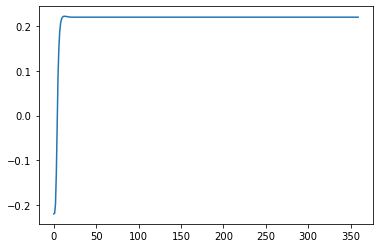

In [ ]:
listevalue = []
for y in tqdm(range(360)) : 
    scalar_df_st_grouped_merged['ff_test'] = [-(abs(y-i)) for i in scalar_df_st_grouped_merged['ff']]
    listevalue.append(scalar_df_st_grouped_merged[['ff_test','Ground_truth']].corr()['ff_test']['Ground_truth'])
plt.plot(range(360),listevalue)
scalar_df_st_grouped_merged

#Valeur maximisant la corrélation 
print(np.argmax(np.array(listevalue)))
print(np.max(np.array(listevalue)))
print("min")
print(np.argmin(np.array(listevalue)))
print(np.min(np.array(listevalue)))

#Pas d'amélioration notable sauf si on scale les données

# IMPACT DE LA DIRECTION DU VENT

In [ ]:
df_st_grouped = df_st.groupby('Id_').var()
df_st_grouped_merged = pd.merge(df_st_grouped,df_y_train,how="left",left_on="Id_", right_on="Id")
df_st_grouped_merged = df_st_grouped_merged.dropna()
scalar_df_st_grouped_merged= df_st_grouped_merged[['ff','t','td','hu','dd','precip','Ground_truth']]
scaled_df_st_grouped_merged = (scalar_df_st_grouped_merged-scalar_df_st_grouped_merged.mean())/(scalar_df_st_grouped_merged.std())
scaled_df_st_grouped_merged['Id'] = df_st_grouped_merged['Id_y']


KeyError: 'Id_y'

In [ ]:
import matplotlib.pyplot as plt 
from tqdm import tqdm
listevalue = []
for y in tqdm(range(360)) : 
    scalar_df_st_grouped_merged['dd_test'] = [-(abs(y-i)) for i in scalar_df_st_grouped_merged['dd']]
    listevalue.append(scalar_df_st_grouped_merged[['dd_test','Ground_truth']].corr()['dd_test']['Ground_truth'])
plt.plot(range(360),listevalue)

#Valeur maximisant la corrélation 
print(np.argmax(np.array(listevalue)))
print(np.max(np.array(listevalue)))
print("min")
print(np.argmin(np.array(listevalue)))
print(np.min(np.array(listevalue)))
#Il faut prendre la derniere vitesse du vent et faire l'écart avec 192

In [ ]:
df_st

In [ ]:
(df_st['hu'].astype(int).value_counts()/df_st.shape[0]).cumsum().head(50)

# IMPACT DE L HUMIDITE

In [ ]:
df_station_train["Id_"] = ["_".join(i.split('_')[:2]) for i in list(df_station_train['Id'])]
df_st = df_station_train.dropna()
df_st = df_st[['ff','t','td','hu','dd','precip','Id_']]
df_st_grouped = df_st.groupby('Id_').last() 
df_st_grouped_merged = pd.merge(df_st_grouped,df_y_train,how="left",left_on="Id_", right_on="Id")
df_st_grouped_merged = df_st_grouped_merged.dropna()
scalar_df_st_grouped_merged= df_st_grouped_merged[['ff','t','td','hu','dd','precip','Ground_truth']]
scaled_df_st_grouped_merged = (scalar_df_st_grouped_merged-scalar_df_st_grouped_merged.mean())/(scalar_df_st_grouped_merged.std())
scaled_df_st_grouped_merged['Id'] = df_st_grouped_merged['Id']

In [ ]:
dd = pd.merge(df_st,df_y_train,how="left",left_on="Id_", right_on="Id").dropna()
dd['hu'] = dd['hu'].astype(int)
dd.sort_values("Ground_truth",ascending=False).head(1000)['hu'].value_counts().head(50)

96     78
94     51
95     48
93     44
92     41
91     38
97     36
88     31
89     30
98     26
90     26
85     24
99     22
86     21
74     19
71     18
82     18
87     18
83     18
70     18
62     18
68     17
67     17
69     17
64     16
78     16
63     15
73     15
81     15
84     14
76     14
72     14
79     14
59     13
61     13
66     13
80     12
75     11
60     11
65     10
77     10
57      9
53      7
54      7
100     6
55      5
56      5
58      5
48      4
52      4
Name: hu, dtype: int64

# COMBINAISON TEMPERATURE ET HUMIDITE

In [ ]:
df_station_train["Id_"] = ["_".join(i.split('_')[:2]) for i in list(df_station_train['Id'])]
df_st = df_station_train.dropna()
df_st = df_st[['ff','t','td','hu','dd','precip','Id_']]
df_merged = pd.merge(df_st,df_y_train,how="left",left_on="Id_", right_on="Id").dropna()


In [ ]:
df_merged['new_humidity'] = df_merged['hu']+(df_merged['t'])/df_merged['hu']

In [ ]:
df_merged_grouped = df_merged.groupby("Id_").sum()

In [ ]:
df_merged_grouped.corr()

,ff,t,td,hu,dd,precip,number_sta,Ground_truth,new_humidity
ff,1.000000,-0.088957,-0.069697,0.031160,0.215875,0.302832,0.020738,0.172931,0.024858
t,-0.088957,1.000000,0.920270,-0.442863,0.116066,-0.061899,0.024930,-0.045032,-0.432647
td,-0.069697,0.920270,1.000000,-0.080911,0.207087,0.042584,-0.008962,-0.006735,-0.072621
hu,0.031160,-0.442863,-0.080911,1.000000,0.153483,0.260775,-0.079669,0.092625,0.997759
dd,0.215875,0.116066,0.207087,0.153483,1.000000,0.176988,-0.026723,0.091410,0.151860
precip,0.302832,-0.061899,0.042584,0.260775,0.176988,1.000000,-0.014789,0.236968,0.261256
number_sta,0.020738,0.024930,-0.008962,-0.079669,-0.026723,-0.014789,1.000000,-0.015089,-0.080310
Ground_truth,0.172931,-0.045032,-0.006735,0.092625,0.091410,0.236968,-0.015089,1.000000,0.091496
new_humidity,0.024858,-0.432647,-0.072621,0.997759,0.151860,0.261256,-0.080310,0.091496,1.000000


# IMPACT TEMPERATURE

In [ ]:
df_station_train["Id_"] = ["_".join(i.split('_')[:2]) for i in list(df_station_train['Id'])]
df_st = df_station_train.dropna()
df_st = df_st[['ff','t','td','hu','dd','precip','Id_']]
df_st['diff_t'] = ((df_st['t'] - df_st['td'] ))

In [ ]:
#df_grouped_merged = df_grouped_merged.groupby("Id_").mean()
df_grouped_merged = pd.merge(df_st,df_y_train,how="left",left_on="Id_", right_on="Id").dropna()


In [ ]:
df_grouped_merged.groupby("Id_").mean().corr()

,ff,t,td,hu,dd,precip,diff_t,number_sta,Ground_truth
ff,1.000000,-0.093400,-0.074598,0.030871,0.215800,0.302805,-0.073925,0.020678,0.172939
t,-0.093400,1.000000,0.915779,-0.464335,0.116560,-0.064371,0.547588,0.022974,-0.046787
td,-0.074598,0.915779,1.000000,-0.094483,0.211580,0.043238,0.165364,-0.012353,-0.007600
hu,0.030871,-0.464335,-0.094483,1.000000,0.153123,0.260839,-0.943246,-0.080142,0.092600
dd,0.215800,0.116560,0.211580,0.153123,1.000000,0.176950,-0.154561,-0.026860,0.091395
precip,0.302805,-0.064371,0.043238,0.260839,0.176950,1.000000,-0.248117,-0.014821,0.236964
diff_t,-0.073925,0.547588,0.165364,-0.943246,-0.154561,-0.248117,1.000000,0.082140,-0.099044
number_sta,0.020678,0.022974,-0.012353,-0.080142,-0.026860,-0.014821,0.082140,1.000000,-0.015099
Ground_truth,0.172939,-0.046787,-0.007600,0.092600,0.091395,0.236964,-0.099044,-0.015099,1.000000


In [ ]:
df_grouped_merged.dropna().sort_values("Ground_truth",ascending=False).corr()

,ff,t,td,hu,dd,precip,diff_t,number_sta,Ground_truth
ff,1.000000,0.053337,-0.024321,-0.164443,0.208484,0.124916,0.132474,0.016778,0.140458
t,0.053337,1.000000,0.838562,-0.561201,0.139529,-0.023527,0.620693,0.020406,-0.041520
td,-0.024321,0.838562,1.000000,-0.053365,0.178573,0.044060,0.093331,-0.011799,-0.007257
hu,-0.164443,-0.561201,-0.053365,1.000000,-0.001145,0.119507,-0.948796,-0.053077,0.061321
dd,0.208484,0.139529,0.178573,-0.001145,1.000000,0.049080,-0.002002,-0.020902,0.071132
precip,0.124916,-0.023527,0.044060,0.119507,0.049080,1.000000,-0.106404,-0.005852,0.093540
diff_t,0.132474,0.620693,0.093331,-0.948796,-0.002002,-0.106404,1.000000,0.054273,-0.065435
number_sta,0.016778,0.020406,-0.011799,-0.053077,-0.020902,-0.005852,0.054273,1.000000,-0.015108
Ground_truth,0.140458,-0.041520,-0.007257,0.061321,0.071132,0.093540,-0.065435,-0.015108,1.000000


# RECUPERER DERNIERE HEURE (non pertinent)

In [ ]:
df_station_train['hour'] = [i.split('_')[-1] for i in df_station_train['Id']]
df_station_train['hour'] = df_station_train['hour'].astype(int)

In [ ]:
df_last_hour = df_station_train.sort_values('hour').drop_duplicates("Id_",keep="last")
df_last_hour['new_hu'] = [int(i>=90) for i in  df_last_hour['hu']]

In [ ]:
df_last_hour_merged = pd.merge(df_last_hour,df_y_train,how="left",left_on="Id_", right_on="Id")
df_last_hour_merged.dropna().sort_values("Ground_truth",ascending=False).tail(100).mean()

number_sta_x    4.964813e+07
ff              2.183500e+00
t               2.756367e+02
td              2.724056e+02
hu              8.007900e+01
dd              1.259600e+02
precip          0.000000e+00
Id_x                     inf
Id_                      inf
hour            2.300000e+01
new_hu          2.900000e-01
number_sta_y    4.964813e+07
Ground_truth    0.000000e+00
Id_y                     inf
dtype: float64

# SAVOIR SI IL N A PAS PLUT

<AxesSubplot:>

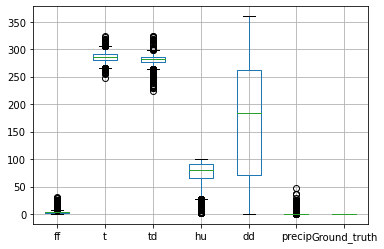

In [ ]:
df_merged[df_merged['Ground_truth']==0][['ff', 't', 'td', 'hu', 'dd', 'precip', 'Ground_truth']].boxplot()

<AxesSubplot:>

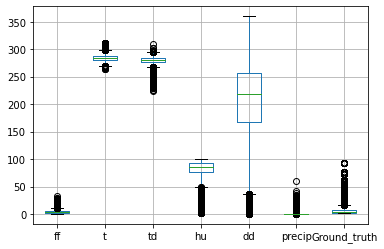

In [ ]:
df_merged[df_merged['Ground_truth']>1][['ff', 't', 'td', 'hu', 'dd', 'precip', 'Ground_truth']].boxplot()

In [ ]:
df_merged['diff_tt'] = df_merged['t'] - df_merged['td']

In [ ]:
from sklearn import tree
dftest = df_merged.groupby("Id_").mean().sample(80000)
X = dftest[['ff', 't', 'td', 'hu', 'dd', 'precip',"diff_tt"]]
Y = (dftest['Ground_truth']<=1).astype(int)
clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X, Y)

[Text(558.0, 475.65000000000003, 'X[5] <= 0.024\ngini = 0.416\nsamples = 80000\nvalue = [23621, 56379]'),
 Text(279.0, 339.75, 'X[4] <= 103.312\ngini = 0.3\nsamples = 50771\nvalue = [9328, 41443]'),
 Text(139.5, 203.85000000000002, 'X[1] <= 283.709\ngini = 0.144\nsamples = 12673\nvalue = [993, 11680]'),
 Text(69.75, 67.94999999999999, 'gini = 0.105\nsamples = 7470\nvalue = [415, 7055]'),
 Text(209.25, 67.94999999999999, 'gini = 0.197\nsamples = 5203\nvalue = [578, 4625]'),
 Text(418.5, 203.85000000000002, 'X[1] <= 288.944\ngini = 0.342\nsamples = 38098\nvalue = [8335, 29763]'),
 Text(348.75, 67.94999999999999, 'gini = 0.382\nsamples = 23813\nvalue = [6115, 17698]'),
 Text(488.25, 67.94999999999999, 'gini = 0.263\nsamples = 14285\nvalue = [2220, 12065]'),
 Text(837.0, 339.75, 'X[5] <= 0.114\ngini = 0.5\nsamples = 29229\nvalue = [14293, 14936]'),
 Text(697.5, 203.85000000000002, 'X[2] <= 279.83\ngini = 0.483\nsamples = 13313\nvalue = [5423, 7890]'),
 Text(627.75, 67.94999999999999, 'gini

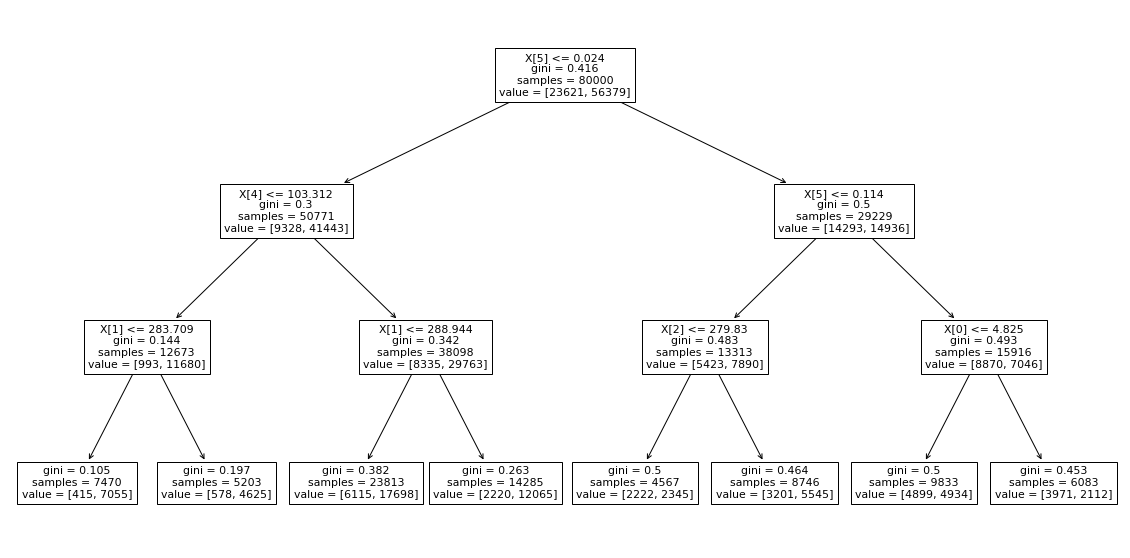

In [ ]:
tree.plot_tree(clf)

# Transformer heures en colonnes

In [ ]:
df = df_station_train
df['dd_'] = [-(abs(192-i)) for i in df['dd']]
df_station_train["Id_"] = ["_".join(i.split('_')[:2]) for i in list(df_station_train['Id'])]
df.index = df['Id_']
del df['Id_']
df_grouped_count = df.groupby('Id_').count()
df_grouped_count_24 = df_grouped_count[df_grouped_count['td']==24]
df_all_hours = df.loc[df_grouped_count_24.index]
df_all_hours['Id_'] = df_all_hours.index
index_id =list(df_all_hours.columns).index('Id_')
index_hour = list(df_all_hours.columns).index('hour')
index_ff = list(df_all_hours.columns).index('ff')
index_t = list(df_all_hours.columns).index('t')
index_td = list(df_all_hours.columns).index('td')
index_hu= list(df_all_hours.columns).index('hu')
index_dd_ = list(df_all_hours.columns).index('dd_')
index_precip = list(df_all_hours.columns).index('precip')
dict_stations = {}
dict_heures = {}
for station_jour in set(df_all_hours.index):
    dict_stations[station_jour] = np.zeros([6,24]).astype('f')
    


for i in tqdm(df_all_hours.values):
    dict_stations[i[index_id]][0][i[index_hour]] = i[index_ff]
    dict_stations[i[index_id]][1][i[index_hour]] = i[index_t]
    dict_stations[i[index_id]][2][i[index_hour]] = i[index_td]
    dict_stations[i[index_id]][3][i[index_hour]] = i[index_hu]
    dict_stations[i[index_id]][4][i[index_hour]] = i[index_dd_]
    dict_stations[i[index_id]][5][i[index_hour]] = i[index_precip]
new_def_colums_hours = pd.DataFrame([[station]+[a for i in dict_stations[station] for a in i ] for station in set(df_all_hours.index)])
new_def_colums_hours_merged = pd.merge(new_def_colums_hours,df_y_train,left_on =0,right_on='Id')
new_def_colums_hours_merged
del new_def_colums_hours_merged['date']
del new_def_colums_hours_merged['number_sta']
del new_def_colums_hours_merged['Id']
new_def_colums_hours_merged = new_def_colums_hours_merged.dropna()

new_def_colums_hours_merged_prediction = pd.merge(new_def_colums_hours_merged,baseline_forecast,left_on =0,right_on='Id')
new_def_colums_hours_merged_prediction
del new_def_colums_hours_merged_prediction['number_sta']
del new_def_colums_hours_merged_prediction['date']
del new_def_colums_hours_merged_prediction['Id']
new_def_colums_hours_merged_prediction
train = new_def_colums_hours_merged_prediction
colonnestrain  = list(new_def_colums_hours_merged.columns)
colonnestrain.remove('Ground_truth')
X_train = train[list(train.columns[:24])+[48,72,96,120,144]+['Prediction']] #mettre ici colonnestrain
Y_train = train['Ground_truth']
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.25, random_state=42)


x_train = x_train.astype('f')
x_test = x_test.astype('f')
y_train = y_train.astype('f')
y_test = y_test.astype('f')
x_train = ((x_train - x_train.mean())/x_train.std())
x_test = ((x_test - x_test.mean())/x_test.std())

100%|████████████████████████████████████████████████████████████████████| 4409064/4409064 [00:31<00:00, 141898.97it/s]


In [ ]:
X_train.to_csv('dataTrain_v2.csv')

# PRENDRE EN COMPTE LA DIRECTION DU VENT ET LES STATIONS  OU IL A PLUT (NON ABOUTIE)

In [ ]:
df_st
pd.merge(df_st,df_stations_coordinate,how='left',left_on='number_sta',right_on='number_sta')

,number_sta,date,ff,t,td,hu,dd,precip,Id,Id_,hour,dd_,div_t,diff_t,lat,lon,height_sta
0,14066001,2016-01-01 00:00:00,3.05,279.28,277.97,91.4,200.0,0.0,14066001_0_0,14066001_0,0,-8.0,-1.004713,-1.31,49.334,-0.431,2.0
1,14066001,2016-01-01 01:00:00,2.57,278.76,277.45,91.4,190.0,0.0,14066001_0_1,14066001_0,1,-2.0,-1.004722,-1.31,49.334,-0.431,2.0
2,14066001,2016-01-01 02:00:00,2.26,278.27,277.02,91.7,181.0,0.0,14066001_0_2,14066001_0,2,-11.0,-1.004512,-1.25,49.334,-0.431,2.0
3,14066001,2016-01-01 03:00:00,2.62,277.98,276.95,93.0,159.0,0.0,14066001_0_3,14066001_0,3,-33.0,-1.003719,-1.03,49.334,-0.431,2.0
4,14066001,2016-01-01 04:00:00,2.99,277.32,276.72,95.9,171.0,0.0,14066001_0_4,14066001_0,4,-21.0,-1.002168,-0.60,49.334,-0.431,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2264100,95690001,2017-12-30 19:00:00,9.10,286.68,283.44,80.8,239.0,0.0,95690001_729_19,95690001_729,19,-47.0,-1.011431,-3.24,49.108,1.831,126.0
2264101,95690001,2017-12-30 20:00:00,8.58,286.39,283.21,81.1,231.0,0.0,95690001_729_20,95690001_729,20,-39.0,-1.011228,-3.18,49.108,1.831,126.0
2264102,95690001,2017-12-30 21:00:00,8.74,286.28,283.40,82.6,226.0,0.0,95690001_729_21,95690001_729,21,-34.0,-1.010162,-2.88,49.108,1.831,126.0
2264103,95690001,2017-12-30 22:00:00,9.04,286.21,283.29,82.4,224.0,0.0,95690001_729_22,95690001_729,22,-32.0,-1.010307,-2.92,49.108,1.831,126.0


In [ ]:
def angleFromCoordinate(lat1, long1, lat2, long2):
    dLon = (long2 - long1)
    y = math.sin(dLon) * math.cos(lat2)
    x = math.cos(lat1) * math.sin(lat2) - math.sin(lat1) * math.cos(lat2) * math.cos(dLon)
    brng = math.atan2(y, x)
    brng = math.degrees(brng)
    brng = (brng + 360) % 360
    brng = 360 - brng # count degrees clockwise - remove to make counter-clockwise
    return brng

# CREATION COLONNES

24 precipitations , mean 24 precip , sum 24 precip
humidity mean 11
ff mean 22
dd mean 16
mois en cours

In [ ]:
df_station_train['number_sta'] = [ i.split('_')[0] for i in df_station_train['Id_']]

In [ ]:
df_station_train_grouped = df_station_train.groupby("Id_").mean()

In [ ]:
df_station_train_grouped['number_sta'] = df_station_train_grouped.index

In [ ]:
df_station_train['']
df_station_train["Id_"] = ["_".join(i.split('_')[:2]) for i in list(df_station_train['Id'])]
df_station_train['hour'] = [i.split("_")[-1] for i in df_station_train['Id']]
df_station_train['jour'] = [i.split("_")[-1] for i in df_station_train['Id_']]
df_station_train['dd_'] = [-(abs(192-i)) for i in df_station_train['dd']]

In [ ]:
def agg_mean(df = df_station_train,df_grouped = df_station_train_grouped ,numb_station ='number_sta' ,day = "jour",hour="hour",objectif = 'precip',intervalle=24 ) :
    indice_jour = list(df.columns).index(day)
    indice_heure = list(df.columns).index(hour)
    indice_objectif = list(df.columns).index(objectif)
    indice_numb_station = list(df.columns).index(numb_station)
    dictionnaire_stations_jours = {}
    for i in set(df[numb_station]):
        dictionnaire_stations_jours[i] =np.full((730, 24), 10000,dtype='f')
    for i in tqdm(df.values) :
        dictionnaire_stations_jours[i[1]][int(i[indice_jour])][int(i[indice_heure])] = i[indice_objectif]
    liste_values = []
    for ind in tqdm(df_grouped.index) :
        values = dictionnaire_stations_jours[int(ind.split('_')[0])][int(ind.split('_')[1])]
        liste_values.append(values[values<9999][-intervalle:].mean())
    return liste_values
agg_mean()

  0%|                                                                                      | 0/2304802 [00:00<?, ?it/s]


KeyError: 12

In [ ]:
df_station_train_grouped = df_station_train.groupby("Id_").mean()
df_station_train_grouped['mean_hu'] = agg_mean(objectif = 'hu',intervalle=11)
df_station_train_grouped['mean_ff'] = agg_mean(objectif = 'ff',intervalle=22)
df_station_train_grouped['mean_dd'] = agg_mean(objectif = 'dd_',intervalle=16)
df_station_train_grouped['Id'] = df_station_train_grouped.index
df_station_train_grouped.to_csv("data_trainV1.csv")

In [ ]:
all_stations = set(df_station_train['number_sta'])
for i in tqdm(all_stations):
    d = df_station_train[df_station_train['number_sta']==i].shape[0]
    print(d)
 

  5%|███▉                                                                             | 13/267 [00:00<00:04, 60.57it/s]

17520
17520
17520
17520
17520
17520
17520
9559
17520
8821
17520
15904
10353


  7%|██████                                                                           | 20/267 [00:00<00:04, 55.82it/s]

17520
17520
17520
17520
17520
17520
17520
12609
17459
17520
17520


 12%|██████████                                                                       | 33/267 [00:00<00:04, 55.73it/s]

17520
17520
5491
17520
17520
17520
14629
17520
17520
17520
17520


 17%|█████████████▋                                                                   | 45/267 [00:00<00:03, 56.91it/s]

17520
10981
17520
17520
17520
17520
17520
17520
17520
17520
17520


 21%|█████████████████▎                                                               | 57/267 [00:01<00:03, 53.72it/s]

17520
17520
17520
17520
2058
17520
17520
17520
17520
17520
17520


 24%|███████████████████▍                                                             | 64/267 [00:01<00:03, 57.87it/s]

17520
17520
17520
17520
17520
10231
17520
17520
17520
17520
8815
17520
17520


 29%|███████████████████████▎                                                         | 77/267 [00:01<00:03, 55.74it/s]

17520
17520
17520
17520
17520
17520
17520
17520
17520
17520


 33%|███████████████████████████                                                      | 89/267 [00:01<00:03, 53.97it/s]

17520
17520
12657
17520
17520
17520
17520
17520
17520
17520


 36%|████████████████████████████▊                                                    | 95/267 [00:01<00:03, 50.69it/s]

77
17520
17520
17520
17520
17520
17520
17520
17520
17520


 40%|████████████████████████████████                                                | 107/267 [00:01<00:03, 52.47it/s]

477
17520
17520
17520
17520
17520
17518
17520
17520
7642
17520


 45%|███████████████████████████████████▋                                            | 119/267 [00:02<00:02, 49.97it/s]

17520
17520
17520
8815
17520
17520
17520
17520
17520
17520


 49%|██████████████████████████████████████▉                                         | 130/267 [00:02<00:02, 49.05it/s]

17520
17520
17520
17520
17520
17520
17520
17520
17520
17520


 51%|████████████████████████████████████████▍                                       | 135/267 [00:02<00:02, 48.94it/s]

17520
17520
17520
17520
17520
17520
17520


 52%|█████████████████████████████████████████▉                                      | 140/267 [00:02<00:03, 38.98it/s]

16362
17520
17520
17520
17520
12546


 56%|████████████████████████████████████████████▋                                   | 149/267 [00:03<00:03, 33.67it/s]

17520
10520
10001
17520
17520
17520
17520
17520
5839


 59%|███████████████████████████████████████████████▎                                | 158/267 [00:03<00:03, 33.05it/s]

17520
17520
17520
17520
17520
17520


 61%|████████████████████████████████████████████████▌                               | 162/267 [00:03<00:03, 31.13it/s]

17520
17520
17520
17520
17520
17520
17520


 64%|███████████████████████████████████████████████████▌                            | 172/267 [00:03<00:02, 38.23it/s]

17520
17520
17520
17520
17520
13112
17520
17520
17520
17520
17520


 69%|██████████████████████████████████████████████████████▊                         | 183/267 [00:03<00:01, 42.87it/s]

17520
17520
17520
17520
17520
17520
14656
17520
17520
17520


 73%|██████████████████████████████████████████████████████████▏                     | 194/267 [00:04<00:01, 46.13it/s]

17520
17520
17520
17520
17520
17520
17520
7739
17520
17520


 77%|█████████████████████████████████████████████████████████████▍                  | 205/267 [00:04<00:01, 42.14it/s]

17520
17520
17520
17520
17520
17520
17520
17520


 79%|███████████████████████████████████████████████████████████████▏                | 211/267 [00:04<00:01, 45.53it/s]

17520
17391
17520
17520
17520
17520
17520
17520
17520
17520


 83%|██████████████████████████████████████████████████████████████████▏             | 221/267 [00:04<00:01, 43.46it/s]

17520
17520
17520
17520
17520
17520
17520
17520
17520


 87%|█████████████████████████████████████████████████████████████████████▏          | 231/267 [00:04<00:00, 46.42it/s]

17520
79
286
17520
17520
17520
17520
17520
17520
17520
17520


 90%|████████████████████████████████████████████████████████████████████████▏       | 241/267 [00:05<00:00, 46.66it/s]

17520
17520
17520
17520
9851
17520
17520
17520
17520
17520
3114


 93%|██████████████████████████████████████████████████████████████████████████      | 247/267 [00:05<00:00, 46.45it/s]

17520
17520
17520
17520
17520
17520


 98%|██████████████████████████████████████████████████████████████████████████████▌ | 262/267 [00:05<00:00, 41.36it/s]

17520
9610
17520
17520
17520
17520
17520
17520
17520
17520


100%|████████████████████████████████████████████████████████████████████████████████| 267/267 [00:05<00:00, 46.06it/s]

4592
17520
17520
17520
17520


In [ ]:

dico = {}
for i in set(df_y_train['number_sta']):
    a = df_y_train[df_y_train['number_sta'] ==i].shape
    if a[0] == 730 :
        dico[i] = list(df_y_train[df_y_train['number_sta']==i]['Ground_truth'])  
        

In [ ]:


cles_station = list(dico.keys())
df_precipitation_kmeans = pd.DataFrame.from_dict(dico)



In [ ]:
df_station_train[['ff','t','td','hu','dd','precip']]

In [ ]:
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt 
def find_optimal_clusters(data, max_k):
    iters = range(1, max_k+1)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048).fit(data).inertia_)
        #print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(df_precipitation_kmeans.T.fillna(0), 20)

In [ ]:
df_precipitation_kmeans.T.dropna()

In [ ]:
df_precipitation_kmeans.T.fillna(0.2)

In [ ]:
#K means en fonction des différentes précipitations
from sklearn.cluster import KMeans
import numpy as np
X = np.array([[1, 2], [1, 4], [1, 0],
              [10, 2], [10, 4], [10, 0]])
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
kmeans.labels_


In [ ]:
df_station_train["Id_"] = ["_".join(i.split('_')[:2]) for i in list(df_station_train['Id'])]

In [ ]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
reg = GradientBoostingRegressor(random_state=0)
df_station_train.groupby("Id_").mean()

# MACHINE LEARNING

In [ ]:
train = pd.read_csv("data_trainV1.csv")

In [ ]:
train_merged = pd.merge(train,df_y_train,how="left",left_on="Id_", right_on="Id").dropna()
train_merged2 = pd.merge(train_merged,baseline_forecast,how="left",left_on="Id_", right_on="Id").dropna()

In [ ]:
X_train = train_merged[['ff','t','td','hu','dd','precip','mean_hu','mean_ff','mean_dd']]
X_train =(X_train - X_train.mean())/X_train.std()
Y_train = train_merged['Ground_truth']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.25, random_state=42)

In [ ]:
def score(predictions,labels):
    return np.mean([np.abs((labels[i]-predictions[i])/(labels[i]+1)) for i in range(len(predictions))])*100

In [ ]:
#XGBREGRESSOR
xgb_model = xgb.XGBRegressor( max_depth =20 )
xgb_model.fit(np.array(x_train).astype('f'), y_train)
y_pred = xgb_model.predict(x_test)
score(np.array(y_test),y_pred)


53.199251296420854

# Prediction de pluie ou non

In [ ]:
train_merged2['pluie'] = (train_merged2['Ground_truth'] >0.4).astype(int)

In [ ]:
train_merged2.to_csv('train_merged2.csv')

In [ ]:
X_train = train_merged2[['ff','t','td','hu','dd','precip','mean_hu','mean_ff','mean_dd','Prediction']]
#X_train =(X_train - X_train.mean())/X_train.std()
Y_train = train_merged2['pluie']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.25, random_state=42)

In [ ]:
xg_cl_default = xgb.XGBClassifier(max_depth=10)
xg_cl_default.fit(x_train,y_train)
pred2 = xg_cl_default.predict(x_test)
conf = confusion_matrix(y_test, pred2)
(conf[0,0]+conf[1,1])/np.sum(conf)

[19:30:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8724592707525214

In [ ]:
conf

array([[22186,  2362],
       [ 2570, 11552]], dtype=int64)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

clf = RandomForestClassifier()
clf.fit(x_train, y_train)
pred1 = clf.predict(x_test)
conf = confusion_matrix(y_test, pred1)
(conf[0,0]+conf[1,1])/np.sum(conf)

0.8769071631755884

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(x_train, y_train)
pred3 = clf.predict(x_test)
conf = confusion_matrix(y_test, pred3)
(conf[0,0]+conf[1,1])/np.sum(conf)

C:\Users\yseba\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8444013447116628

In [ ]:
conf

array([[23230,  1318],
       [ 4699,  9423]], dtype=int64)

# DEEP LEARNING

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation,Flatten,BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, InputLayer 
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import scipy
import scipy.ndimage
import numpy as np
from tensorflow.keras import backend as K

In [ ]:
def custom_loss_function(y_true, y_pred):
    return tf.math.reduce_mean(tf.abs(y_true-y_pred)/(y_true+1))*100

# PREDICTION DE PLUIE

In [ ]:


def getSimplePerceptron(nb_classes=2):
    model = Sequential()
    model.add(InputLayer(input_shape=(10)))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    opt = SGD(learning_rate=0.1, momentum=0.9)
    model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])
    return model

model=getSimplePerceptron()
model=getSimplePerceptron()
batch_size = 256
epochs=5
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,  verbose=1, validation_data=(x_test, y_test))

Epoch 1/5
454/454 [==============================] - 16s 34ms/step - loss: 0.3454 - accuracy: 0.8580 - val_loss: 0.3370 - val_accuracy: 0.8614
Epoch 2/5
454/454 [==============================] - 15s 34ms/step - loss: 0.3251 - accuracy: 0.8661 - val_loss: 0.3354 - val_accuracy: 0.8626
Epoch 3/5
454/454 [==============================] - 16s 35ms/step - loss: 0.3205 - accuracy: 0.8660 - val_loss: 0.3213 - val_accuracy: 0.8628
Epoch 4/5
454/454 [==============================] - 15s 33ms/step - loss: 0.3175 - accuracy: 0.8673 - val_loss: 0.3194 - val_accuracy: 0.8634
Epoch 5/5
454/454 [==============================] - 15s 33ms/step - loss: 0.3156 - accuracy: 0.8677 - val_loss: 0.3225 - val_accuracy: 0.8638


In [ ]:
conf = confusion_matrix(y_test, pred_nn)
(conf[0,0]+conf[1,1])/np.sum(conf)

0.8544091026635635

In [ ]:
conf

array([[23230,  1318],
       [ 4699,  9423]], dtype=int64)

In [ ]:
pred_nn = model.predict(x_test)
pred_nn = (pred_nn>0.5).astype(int)

In [ ]:
pred_total = (pred_nn.T)[0] + pred2 + pred1
pred_total = (pred_total>1).astype(int)

In [ ]:
conf = confusion_matrix(y_test, pred_total)
(conf[0,0]+conf[1,1])/np.sum(conf)

0.8752779932764417

# DEEP LEARNING REGRESSION CUMUL DE PLUIE

In [ ]:
def getSimplePerceptron(nb_classes=2): 
    model = Sequential()
    model.add(InputLayer(input_shape=(24)))
    model.add(Dense(16))
    model.add(Dense(16, activation='sigmoid'))
    model.add(Dense(16, activation='sigmoid'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss=custom_loss_function, optimizer="adam", metrics=custom_loss_function)
    return model

model=getSimplePerceptron()
model=getSimplePerceptron()
batch_size = 256
epochs=5
model.fit(np.array(x_train).astype('f'), np.array(y_train).astype('f'), batch_size=batch_size, epochs=epochs,  verbose=1)
pred = model.predict(np.array(x_test).astype('f'))
score(pred,np.array(y_test))

Epoch 1/5
454/454 [==============================] - 1s 890us/step - loss: 33.9632 - custom_loss_function: 33.9567
Epoch 2/5
454/454 [==============================] - 0s 955us/step - loss: 29.9529 - custom_loss_function: 29.9623
Epoch 3/5
454/454 [==============================] - 0s 881us/step - loss: 28.0217 - custom_loss_function: 28.0074
Epoch 4/5
454/454 [==============================] - 0s 903us/step - loss: 27.5585 - custom_loss_function: 27.5614
Epoch 5/5
454/454 [==============================] - 0s 918us/step - loss: 27.4496 - custom_loss_function: 27.4586


27.315661311149597

In [ ]:
def getSimplePerceptron(nb_classes=2): 
    model = Sequential()
    model.add(InputLayer(input_shape=(24)))
    model.add(Dense(16))
    model.add(Dense(8, activation='sigmoid'))
    model.add(Dense(8, activation='sigmoid'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss=custom_loss_function, optimizer="adam", metrics=custom_loss_function)
    return model

model=getSimplePerceptron()
model=getSimplePerceptron()
batch_size = 128
epochs=20
model.fit(np.array(x_train).astype('f'), np.array(y_train).astype('f'), batch_size=batch_size, epochs=epochs,  verbose=1)
pred = model.predict(np.array(x_test).astype('f'))
score(pred,np.array(y_test))

Epoch 1/20
454/454 [==============================] - 1s 839us/step - loss: 34.0577 - custom_loss_function: 34.0698
Epoch 2/20
454/454 [==============================] - 0s 861us/step - loss: 30.6775 - custom_loss_function: 30.6680
Epoch 3/20
454/454 [==============================] - 0s 870us/step - loss: 29.3562 - custom_loss_function: 29.3405
Epoch 4/20
454/454 [==============================] - 0s 863us/step - loss: 28.0956 - custom_loss_function: 28.0709
Epoch 5/20
454/454 [==============================] - 0s 848us/step - loss: 27.7350 - custom_loss_function: 27.7414
Epoch 6/20
454/454 [==============================] - 0s 863us/step - loss: 27.5874 - custom_loss_function: 27.5987
Epoch 7/20
454/454 [==============================] - 0s 933us/step - loss: 27.5096 - custom_loss_function: 27.4900
Epoch 8/20
454/454 [==============================] - 0s 901us/step - loss: 27.4562 - custom_loss_function: 27.4584
Epoch 9/20
454/454 [==============================] - 0s 927us/step - lo

26.95307731628418

In [ ]:
def getSimplePerceptron(nb_classes=2): 
    model = Sequential()
    model.add(InputLayer(input_shape=(24)))
    model.add(Dense(16))
    model.add(Dense(8, activation='sigmoid'))
    model.add(Dense(8, activation='sigmoid'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss=custom_loss_function, optimizer="adam", metrics=custom_loss_function)
    return model

model=getSimplePerceptron()
model=getSimplePerceptron()
batch_size = 128
epochs=20
model.fit(np.array(x_train).astype('f'), np.array(y_train).astype('f'), batch_size=batch_size, epochs=epochs,  verbose=1)
pred = model.predict(np.array(x_test).astype('f'))
score(pred,np.array(y_test))

Epoch 1/20
907/907 [==============================] - 1s 861us/step - loss: 32.0770 - custom_loss_function: 32.0735
Epoch 2/20
907/907 [==============================] - 1s 845us/step - loss: 29.6579 - custom_loss_function: 29.6595
Epoch 3/20
907/907 [==============================] - 1s 801us/step - loss: 27.9046 - custom_loss_function: 27.9079
Epoch 4/20
907/907 [==============================] - 1s 831us/step - loss: 27.5555 - custom_loss_function: 27.5586
Epoch 5/20
907/907 [==============================] - 1s 798us/step - loss: 27.4043 - custom_loss_function: 27.4082
Epoch 6/20
907/907 [==============================] - 1s 836us/step - loss: 27.3182 - custom_loss_function: 27.3218
Epoch 7/20
907/907 [==============================] - 1s 932us/step - loss: 27.2270 - custom_loss_function: 27.2284
Epoch 8/20
907/907 [==============================] - 1s 1ms/step - loss: 27.1394 - custom_loss_function: 27.1347
Epoch 9/20
907/907 [==============================] - 1s 1ms/step - loss: 

26.796534657478333

In [ ]:
def getSimplePerceptron(nb_classes=2): 
    model = Sequential()
    model.add(InputLayer(input_shape=(24)))
    model.add(Dense(64))

    model.add(Dense(64))

    model.add(Dense(1, activation='relu'))
    model.compile(loss=custom_loss_function, optimizer="adam", metrics=custom_loss_function)
    return model

model=getSimplePerceptron()
model=getSimplePerceptron()
batch_size = 128
epochs=5
model.fit(np.array(x_train).astype('f'), np.array(y_train).astype('f'), batch_size=batch_size, epochs=epochs,  verbose=1)
pred = model.predict(np.array(x_test).astype('f'))
score(pred,np.array(y_test))

Epoch 1/20
907/907 [==============================] - 1s 934us/step - loss: 26.3743 - custom_loss_function: 26.3758
Epoch 2/20
907/907 [==============================] - 1s 984us/step - loss: 25.9770 - custom_loss_function: 25.9754
Epoch 3/20
907/907 [==============================] - 1s 1ms/step - loss: 25.8765 - custom_loss_function: 25.8948
Epoch 4/20
907/907 [==============================] - 1s 1ms/step - loss: 25.8443 - custom_loss_function: 25.8447
Epoch 5/20
907/907 [==============================] - 1s 1ms/step - loss: 25.8139 - custom_loss_function: 25.8251
Epoch 6/20
907/907 [==============================] - 1s 969us/step - loss: 25.7850 - custom_loss_function: 25.7814
Epoch 7/20
907/907 [==============================] - 1s 1ms/step - loss: 25.7715 - custom_loss_function: 25.7676
Epoch 8/20
907/907 [==============================] - 1s 1ms/step - loss: 25.7072 - custom_loss_function: 25.7012
Epoch 9/20
907/907 [==============================] - 1s 1ms/step - loss: 25.7283 

25.608348846435547

In [ ]:
def getSimplePerceptron(nb_classes=2): 
    model = Sequential()
    model.add(InputLayer(input_shape=(25)))
    model.add(Dense(64,activation='relu'))
    model.add(Dense(64,activation='relu'))
    model.add(Dense(1, activation='relu'))
    model.compile(loss=custom_loss_function, optimizer="adam", metrics=custom_loss_function)
    return model

model=getSimplePerceptron()
model=getSimplePerceptron()
batch_size = 128
epochs=5
model.fit(np.array(x_train).astype('f'), np.array(y_train).astype('f'), batch_size=batch_size, epochs=epochs,  verbose=1)
pred = model.predict(np.array(x_test).astype('f'))
score(pred,np.array(y_test))

Epoch 1/5
907/907 [==============================] - 1s 937us/step - loss: 26.3745 - custom_loss_function: 26.3748
Epoch 2/5
907/907 [==============================] - 1s 944us/step - loss: 25.5852 - custom_loss_function: 25.5881
Epoch 3/5
907/907 [==============================] - 1s 941us/step - loss: 25.3879 - custom_loss_function: 25.3892
Epoch 4/5
907/907 [==============================] - 1s 932us/step - loss: 25.2607 - custom_loss_function: 25.2542
Epoch 5/5
907/907 [==============================] - 1s 985us/step - loss: 25.0998 - custom_loss_function: 25.0941


25.13445019721985

In [ ]:
def getSimplePerceptron(nb_classes=2): 
    model = Sequential()
    model.add(InputLayer(input_shape=(25)))
    model.add(BatchNormalization())
    model.add(Dense(1024,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(256,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(256,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(256,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(256,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(1, activation='relu'))
    model.compile(loss=custom_loss_function, optimizer="adam", metrics=custom_loss_function)
    return model

model=getSimplePerceptron()
model=getSimplePerceptron()
batch_size = 128
epochs=5
model.fit(np.array(x_train).astype('f'), np.array(y_train).astype('f'), batch_size=batch_size, epochs=epochs,  verbose=1)
pred = model.predict(np.array(x_test).astype('f'))
score(pred,np.array(y_test))

Epoch 1/5
907/907 [==============================] - 10s 10ms/step - loss: 27.0194 - custom_loss_function: 27.0168
Epoch 2/5
907/907 [==============================] - 11s 12ms/step - loss: 25.9110 - custom_loss_function: 25.9077
Epoch 3/5
907/907 [==============================] - 13s 14ms/step - loss: 25.6819 - custom_loss_function: 25.6837
Epoch 4/5
907/907 [==============================] - 12s 13ms/step - loss: 25.6677 - custom_loss_function: 25.6647
Epoch 5/5
907/907 [==============================] - 12s 13ms/step - loss: 25.5385 - custom_loss_function: 25.5431


25.10986626148224

In [ ]:
#PREDICTION AVEC LES 24 PREMIERES PRECIP ET BASELINE FORECAST
def getSimplePerceptron(nb_classes=2): 
    model = Sequential()
    model.add(InputLayer(input_shape=(25)))
    model.add(BatchNormalization())
    model.add(Dense(1024,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(1024,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(1024,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(1024,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(1024,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(1, activation='relu'))
    model.compile(loss=custom_loss_function, optimizer="adam", metrics=custom_loss_function)
    return model

model=getSimplePerceptron()
model=getSimplePerceptron()
batch_size = 128
epochs=5
model.fit(np.array(x_train).astype('f'), np.array(y_train).astype('f'), batch_size=batch_size, epochs=epochs,  verbose=1)
pred = model.predict(np.array(x_test).astype('f'))
score(pred,np.array(y_test))

Epoch 1/5
907/907 [==============================] - 50s 54ms/step - loss: 28.2323 - custom_loss_function: 28.2391
Epoch 2/5
907/907 [==============================] - 51s 56ms/step - loss: 26.2512 - custom_loss_function: 26.2471
Epoch 3/5
907/907 [==============================] - 52s 58ms/step - loss: 26.1461 - custom_loss_function: 26.1400
Epoch 4/5
907/907 [==============================] - 53s 59ms/step - loss: 25.9307 - custom_loss_function: 25.9287
Epoch 5/5
907/907 [==============================] - 53s 59ms/step - loss: 25.7587 - custom_loss_function: 25.7627


25.404173135757446

In [ ]:
#AVEC 30 COLONNES
def getSimplePerceptron(nb_classes=2): 
    model = Sequential()
    model.add(InputLayer(input_shape=(30)))
    model.add(BatchNormalization())
    model.add(Dense(1024,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(256,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(256,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(256,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(256,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(1, activation='relu'))
    model.compile(loss=custom_loss_function, optimizer="adam", metrics=custom_loss_function)
    return model

model=getSimplePerceptron()
model=getSimplePerceptron()
batch_size = 128
epochs=5
model.fit(np.array(x_train).astype('f'), np.array(y_train).astype('f'), batch_size=batch_size, epochs=epochs,  verbose=1)
pred = model.predict(np.array(x_test).astype('f'))
score(pred,np.array(y_test))

Epoch 1/5
907/907 [==============================] - 14s 14ms/step - loss: 26.6177 - custom_loss_function: 26.6262
Epoch 2/5
907/907 [==============================] - 12s 13ms/step - loss: 25.2869 - custom_loss_function: 25.2810
Epoch 3/5
907/907 [==============================] - 12s 13ms/step - loss: 25.0177 - custom_loss_function: 25.0225
Epoch 4/5
907/907 [==============================] - 14s 16ms/step - loss: 24.8167 - custom_loss_function: 24.8201
Epoch 5/5
907/907 [==============================] - 14s 16ms/step - loss: 24.7404 - custom_loss_function: 24.7359


24.541087448596954

In [ ]:
def getSimplePerceptron(nb_classes=2): 
    model = Sequential()
    model.add(InputLayer(input_shape=(30)))
    model.add(BatchNormalization())
    model.add(Dense(1024,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(512,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(512,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(512,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(512,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(1, activation='relu'))
    model.compile(loss=custom_loss_function, optimizer="adam", metrics=custom_loss_function)
    return model

model=getSimplePerceptron()
model=getSimplePerceptron()
batch_size = 128
epochs=5
model.fit(np.array(x_train).astype('f'), np.array(y_train).astype('f'), batch_size=batch_size, epochs=epochs,  verbose=1)
pred = model.predict(np.array(x_test).astype('f'))
score(pred,np.array(y_test))

Epoch 1/5
907/907 [==============================] - 31s 33ms/step - loss: 27.4522 - custom_loss_function: 27.4530
Epoch 2/5
907/907 [==============================] - 30s 33ms/step - loss: 25.2647 - custom_loss_function: 25.2587
Epoch 3/5
907/907 [==============================] - 29s 32ms/step - loss: 24.8426 - custom_loss_function: 24.8407
Epoch 4/5
907/907 [==============================] - 28s 31ms/step - loss: 24.6704 - custom_loss_function: 24.6705
Epoch 5/5
907/907 [==============================] - 29s 32ms/step - loss: 24.6284 - custom_loss_function: 24.6297


24.243442714214325